# Image_Compression_using_K_Means_Clustering (From scratch)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#finding closest centroid 

def find_closest_centroids(X,cent):
    m,n = X.shape
    k = cent.shape[0]
    idx = np.zeros(m)
    for i in range(m):
        dist = []
        for j in range(k):
            dif = (np.linalg.norm(X[i] - cent[j]))**2 #norm returns disatnce from origin/length of the vector(scalar value).
            dist.append(dif)
        idx[i] = np.argmin(dist)
    return idx
                
    

In [3]:
# recompute the value for each centroid

def compute_centroids(X,idx,K):
    m,n = X.shape
    upd = np.zeros((K,n))
    for i in range(K):
        indc = []
        for p,q in enumerate(idx):
            if i == q:
                indc.append(p)
        if len(X[indc]) != 0:
            upd[i] = np.sum(X[indc],axis = 0)/len(X[indc])
    return upd


In [4]:
#This is a fn that iteratively run above two functions

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)

    for i in range(max_iters):
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

## Random Initialization

In [6]:
def kMeans_init_centroids(X, K):
    m = X.shape[0]
    randidx = np.random.permutation(m) #it is a shuffling method
    cent = X[randidx[:K]] #select the first K elements as centroids
    return cent 
    

## Image Compression

In [8]:
og_image  = plt.imread("image_org.jpg")

(-0.5, 149.5, 149.5, -0.5)

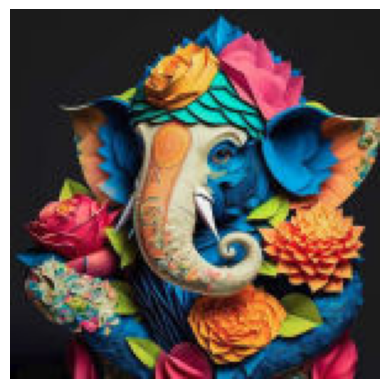

In [9]:
plt.imshow(og_image)
plt.axis('off')

In [10]:
print(og_image.shape)

(150, 150, 3)


In [12]:
# now this image is having 3 dimensions to reduce it to 2, total pixels height*width is made first dimension

m,n,c = og_image.shape
#to make all pixles range between 1 - 0, divide by 255, the max value for all channels
og_image_n = og_image/255
red_img = np.reshape(og_image_n,(m*n,c))
red_img.shape

(22500, 3)

In [14]:
K = 16                       
max_iters = 10 
initial_centroids = kMeans_init_centroids(red_img, K)
centroids, idx = run_kMeans(red_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [15]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (22500,)
Closest centroid for the first five elements: [1. 1. 1. 1. 1.]


In [16]:
idx = idx.astype(int)
rec_img = centroids[idx, : ] #reconstructed image
rec_img.shape

(22500, 3)

In [17]:
rec_img = np.reshape(rec_img,og_image.shape)

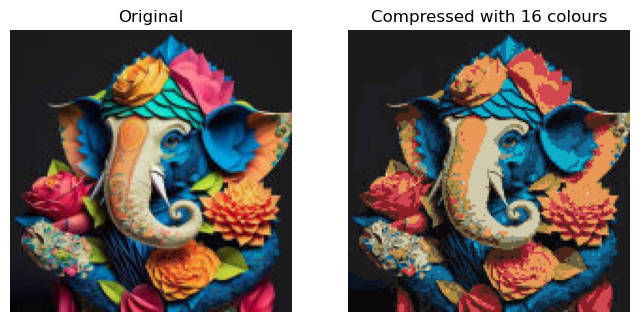

In [18]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(og_image)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(rec_img)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

In [38]:
plt.imsave("image.jpg",rec_img)